In [1]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv("C:/Users/Timan/Desktop/Bike/train.csv")
test = pd.read_csv("C:/Users/Timan/Desktop/Bike/test.csv")

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.info()
print("-"*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity 

In [8]:
train.describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [10]:
print("Shape of The Before Outliers: ", train.shape)
train = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"].std())]
print("Shape of The After Outliers: ", train.shape)

Shape of The Before Outliers:  (10886, 12)
Shape of The After Outliers:  (10739, 12)


In [13]:
data = train.append(test)
data.reset_index(inplace = True, drop = True)
data

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0000,0
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0000,0
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0000,0
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0000,0
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0000,0
5,12.880,0.0,1.0,2011-01-01 05:00:00,0,75,1.0,1,9.84,2,6.0032,0
6,13.635,2.0,2.0,2011-01-01 06:00:00,0,80,0.0,1,9.02,1,0.0000,0
7,12.880,1.0,3.0,2011-01-01 07:00:00,0,86,2.0,1,8.20,1,0.0000,0
8,14.395,1.0,8.0,2011-01-01 08:00:00,0,75,7.0,1,9.84,1,0.0000,0
9,17.425,8.0,14.0,2011-01-01 09:00:00,0,76,6.0,1,13.12,1,0.0000,0


In [25]:
data['date'] = data.datetime.apply(lambda x : x.split()[0])
data['hour'] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data['year'] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data['weekday'] = data.date.apply(lambda x : datetime.strptime(x, "%Y-%m-%d").weekday())
data['month'] = data.date.apply(lambda x : datetime.strptime(x, "%Y-%m-%d").month)
data

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,date,hour,year,weekday,month
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0000,0,2011-01-01,0,2011,5,1
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0000,0,2011-01-01,1,2011,5,1
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0000,0,2011-01-01,2,2011,5,1
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0000,0,2011-01-01,3,2011,5,1
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0000,0,2011-01-01,4,2011,5,1
5,12.880,0.0,1.0,2011-01-01 05:00:00,0,75,1.0,1,9.84,2,6.0032,0,2011-01-01,5,2011,5,1
6,13.635,2.0,2.0,2011-01-01 06:00:00,0,80,0.0,1,9.02,1,0.0000,0,2011-01-01,6,2011,5,1
7,12.880,1.0,3.0,2011-01-01 07:00:00,0,86,2.0,1,8.20,1,0.0000,0,2011-01-01,7,2011,5,1
8,14.395,1.0,8.0,2011-01-01 08:00:00,0,75,7.0,1,9.84,1,0.0000,0,2011-01-01,8,2011,5,1
9,17.425,8.0,14.0,2011-01-01 09:00:00,0,76,6.0,1,13.12,1,0.0000,0,2011-01-01,9,2011,5,1


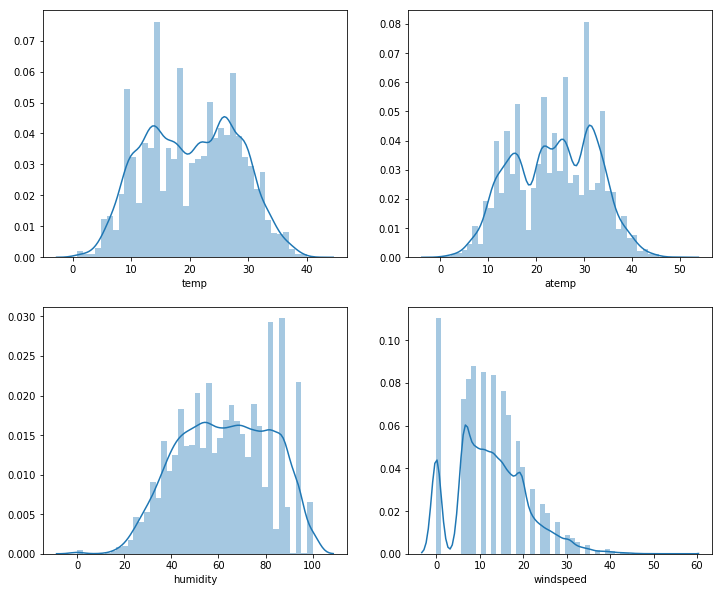

In [18]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(12, 10)
sns.distplot(data["temp"], ax = axes[0][0])
sns.distplot(data["atemp"], ax = axes[0][1])
sns.distplot(data["humidity"], ax = axes[1][0])
sns.distplot(data["windspeed"], ax = axes[1][1])

In [26]:
dataWind0 = data[data["windspeed"] == 0]
dataWindNot0 = data[data["windspeed"] != 0]
rfModel_wind = RandomForestRegressor(n_estimators = 1000, random_state = 42)
windColumns = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])

wind0Values = rfModel_wind.predict(X = dataWind0[windColumns])
dataWind0.loc[:, "windspeed"] = wind0Values
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace = True, drop = True)

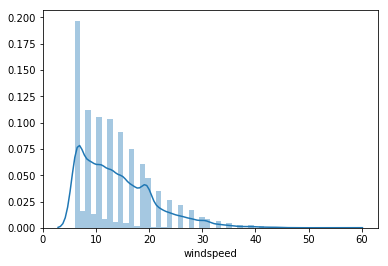

In [27]:
sns.distplot(data["windspeed"])

In [28]:
dataTrain = data[pd.notnull(data["count"])].sort_values(by = ["datetime"])
dataTest = data[~pd.notnull(data["count"])].sort_values(by = ["datetime"])
datetimecol = dataTest["datetime"]
yLabel = dataTrain["count"]
yLabelLog = np.log(yLabel)

In [29]:
dropFeatures = ["casual", "count", "datetime", "date", "registered"]
dataTrain = dataTrain.drop(dropFeatures, axis = 1)
dataTest = dataTest.drop(dropFeatures, axis = 1)

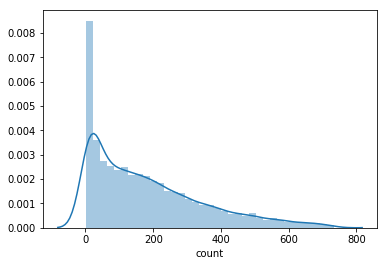

In [31]:
sns.distplot(yLabel)

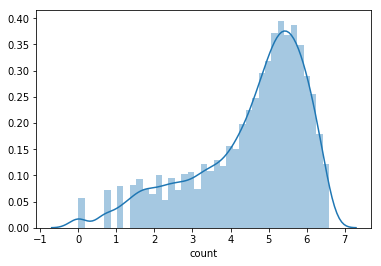

In [33]:
sns.distplot(yLabelLog)

In [35]:
rfModel = RandomForestRegressor(n_estimators = 1000, random_state = 7)
rfModel.fit(dataTrain, yLabelLog)
rfModel.score(dataTrain, yLabelLog)

0.9933423548752963